### Practice 3 - Evaluating annualized risk and returns

Markos Flavio B. G. O.

__Context: Risk and return of assets.__

__Course: Portfolio Selection and Risk Management (Coursera, Rice University)__

The objective of this notebook is to describe and compare different assets using simple return and risk metrics on an annual basis (commonly used in financial reports).
     
__Specific objectives__

    1. Convert .csv into a DataFrame object.
    2. Compute avg. monthly return and monthly volatility 
    3. Compute annualized avg. return and volatility
    4. Plot the assets in the average return and volatility space

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean

#### 1. Convert the CSV file into a DataFrame object

In [26]:
loc = r'D:\Dropbox\Rice University, Portfolio Selection and Risk Management\Notebooks\Data\data1.csv'
df = pd.read_csv(loc, index_col=0)
# formatting
df[df.columns] = df[df.columns].replace({'%': ''}, regex=True)
df[df.columns] = df[df.columns].apply(pd.to_numeric)
df.index = pd.to_datetime(df.index)
print(df.dtypes)
df.head()

APPL       float64
WALMART    float64
IBM        float64
NIKE       float64
dtype: object


,APPL,WALMART,IBM,NIKE
2011-01-31,5.20,3.97,10.38,-3.44
2011-02-28,4.09,-7.29,0.32,7.94
2011-03-31,-1.33,0.84,0.74,-14.67
2011-04-29,0.47,5.63,4.61,8.75
2011-05-31,-0.66,1.10,-0.52,2.59


#### 2. Compute monthly avg. return and monthly volatility 

In [27]:
df_metrics = pd.DataFrame({
    'Mean': df.mean(),
    'Std': df.std()  
}).transpose()
df_metrics

,APPL,WALMART,IBM,NIKE
Mean,1.755167,0.540000,0.176833,2.103333
Std,7.144989,4.815899,4.544961,6.098624


#### 3. Compute annualized avg. return and volatility 

Financial assets' metrics (such as average returns and volatility) are often reported on an annual basis, so we need to annualize our results.

An industry standard method of approximating annualized standard deviations (as volatility) of the returns in a given period $p$ of returns is to multiply the current standard deviation by square root of how many times p fits in one year ($m$). For example, for monthly returns we do:

monthly_volatility.sqrt(12); or for daily returns, we do:

daily_volatility.sqrt(252) (counting only business days).

There're two ways of annualizing arithmetic average returns: considering the nominal rate and the effective rate. The last one takes compounding into consideration, being a more accurate measure of evaluating returns. As we incrase the resolution of the data (monthly to daily, for example), the estimate becomes more accurate (and larger), because compounding is more frequent.(https://global.oup.com/us/companion.websites/9780190296902/sr/interactive/formulas/nominal/).

For the nominal rate we just multiply the mean of the period $r_d$ by $m$.

$r_a = r_d \cdot m$

On the contrary, for the effective rate, we do:

$r_a = (1+r_d)^m-1$, where $r_d$ is the percentage return.

In [28]:
df.mean()/100

APPL       0.017552
WALMART    0.005400
IBM        0.001768
NIKE       0.021033
dtype: float64

In [29]:
df_metrics_annualized = pd.DataFrame({
    'Mean (nominal)': df.mean()*12,
    'Mean (effective)': ((1+df.mean()/100)**12-1)*100,
    'Volatility': df.std()*np.sqrt(12)  
}).transpose()
df_metrics_annualized

,APPL,WALMART,IBM,NIKE
Mean (nominal),21.062000,6.480000,2.122000,25.240000
Mean (effective),23.218989,6.675963,2.142760,28.374583
Volatility,24.750968,16.682764,15.744206,21.126253


Above we're claculating the **annualized expected return**, not the **annualized rate of return**, which is the annualized geommetric mean of the return. The following formula can be used for such purpose:


$ann_{ret} = (1 + \bar{r_g})^{n_{periods}} - 1$,

where $(1 + \bar{r_g}) = \sqrt[T]{\displaystyle\prod_{t=1}^{t=T} (1 + r_t)}$, and

$n_{periods}$ is the inverse of the number of years in the data. For example, if the data is given in days (specifically $d$ days), then:   

$n_{periods} = \frac{252}{d}$

Note from https://www.investopedia.com/terms/a/annualized-rate.asp: "Industry standards for most investments dictate the most precise form of annualized return calculation, which uses days instead of years."

For the sake of demonstration, we'll evaluate the annualized rate of return below. However, the results will not be used in the further experiments. 

In [56]:
dfa = df/100 + 1  # gross return is necessary to use scipy 'gmean' function.
dfa.apply(gmean, axis=0) # same as dfa.prod()**(1/60)

APPL       1.015070
WALMART    1.004271
IBM        1.000741
NIKE       1.019178
dtype: float64

In [58]:
(dfa.apply(gmean, axis=0)**(12/dfa.shape[0])-1)

APPL       0.002996
WALMART    0.000853
IBM        0.000148
NIKE       0.003806
dtype: float64

Checking the results on APPL.

In [62]:
(1+0.002996)**5 # 5 is the number of years in the data

1.015070029484525

We've been looking at monthly data, what if we had annual data directly? In this case we wouldn't need to annualize the data. Let's simulate this case and see if there're any differences in the results.

We're going to use the pandas.resample() method to downsample our data to simulate biannual data and anual data. To do that, we first need to convert our data frame in terms of gross returns instead of percentage returns, because the multiplication of gross returns give us the compound return.

In [5]:
df_gross = df/100 + 1
df_gross.head()

,APPL,WALMART,IBM,NIKE
2011-01-31,1.0520,1.0397,1.1038,0.9656
2011-02-28,1.0409,0.9271,1.0032,1.0794
2011-03-31,0.9867,1.0084,1.0074,0.8533
2011-04-29,1.0047,1.0563,1.0461,1.0875
2011-05-31,0.9934,1.0110,0.9948,1.0259


It turns out that the pandas.resample() method does not always output intuitive results. Look at the links below for more information:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

https://towardsdatascience.com/using-the-pandas-resample-function-a231144194c4

Let's manually calculate what we expect to get with the pandas.resample() method.

In [6]:
df_gross.iloc[:6]['APPL']

2011-01-31    1.0520
2011-02-28    1.0409
2011-03-31    0.9867
2011-04-29    1.0047
2011-05-31    0.9934
2011-06-30    0.9650
Name: APPL, dtype: float64

In [7]:
print('Biannual (APPL ticker - 1st half):', df_gross.iloc[:6]['APPL'].prod())
print('Biannual (APPL ticker - 2nd half):', df_gross.iloc[6:12]['APPL'].prod())
print('Biannual (APPL ticker - last half):', df_gross.iloc[-6:]['APPL'].prod())
print('Annual (APPL ticker):', df_gross.iloc[:12]['APPL'].prod())

Biannual (APPL ticker - 1st half): 1.0406333688264915
Biannual (APPL ticker - 2nd half): 1.2065494167676516
Biannual (APPL ticker - last half): 0.846657778716671
Annual (APPL ticker): 1.2555755842265597


In this case, we could retrieve the desired information by doing (indices are not actually correct, but it doesn't matter):

In [8]:
df_gross_biannual = df_gross.resample('2QS', label='right').prod() # two quarters
df_gross_annual = df_gross.resample('A', label='right').prod()

In [9]:
print(df_gross_biannual[:1])
print(df_gross_annual[-1:])

                APPL   WALMART       IBM      NIKE
2011-07-01  1.040633  0.998887  1.178878  1.061198
                APPL   WALMART       IBM      NIKE
2015-12-31  0.969803  0.733581  0.885806  1.313805


Let's now compute the central tendency (nominal) and volatility for both data frames, and compare them to df_metrics_annualized.

In [10]:
df_biannual = (df_gross_biannual-1)*100
df_annual = (df_gross_annual-1)*100

In [11]:
df_biannual.head()

,APPL,WALMART,IBM,NIKE
2011-07-01,4.063337,-0.111295,17.887774,6.119819
2012-01-01,20.654942,13.966487,8.081276,7.890107
2012-07-01,44.199541,18.250153,7.221162,-8.308377
2013-01-01,-8.063404,-1.066969,-1.216795,18.519997
2013-07-01,-24.556197,10.529815,0.660077,24.303157


In [12]:
df_annual

,APPL,WALMART,IBM,NIKE
2011-12-31,25.557558,13.839648,27.414610,14.492786
2012-12-31,32.572150,16.988461,5.916501,8.672908
2013-12-31,8.067783,18.138673,-0.168025,54.501826
2014-12-31,40.628792,11.888234,-12.398458,23.773754
2015-12-31,-3.019722,-26.641943,-11.419429,31.380509


In [13]:
df_biannual_metrics_annualized = pd.DataFrame({
    'Mean': df_biannual.mean()*2,
    'Std': df_biannual.std()*np.sqrt(2)
}).transpose()
df_biannual_metrics_annualized

,APPL,WALMART,IBM,NIKE
Mean,23.187928,6.444726,1.631076,25.210015
Std,32.427665,16.759585,12.883634,15.985409


In [14]:
df_annual_metrics = pd.DataFrame({
    'Mean': df_annual.mean(),
    'Std': df_annual.std()
}).transpose()
df_annual_metrics

,APPL,WALMART,IBM,NIKE
Mean,20.761312,6.842615,1.869040,26.564357
Std,17.915635,18.882343,16.226927,17.869749


In [15]:
df_metrics_annualized

,APPL,WALMART,IBM,NIKE
Mean (nominal),21.062000,6.480000,2.122000,25.240000
Mean (effective),23.218989,6.675963,2.142760,28.374583
Volatility,24.750968,16.682764,15.744206,21.126253


The annualized metrics return different results depending on the resolution of the sample data. The means are still very similar, but the standard deviation sharply varies, being the annual data itself the one with smaller volatility. 

In conclusion, annualizing return and stanard deviation are not actually a way of getting the actual annual metrics (which is straightforward to do with down sampling). It's a feature from the data (including its resolution) we're looking at, commonly used in the financial industry.

One must always indicate the given period the annualize rates were comuted from, together with annualize metrics themselves.

#### 4. Plotting the assets in the average return and volatility space

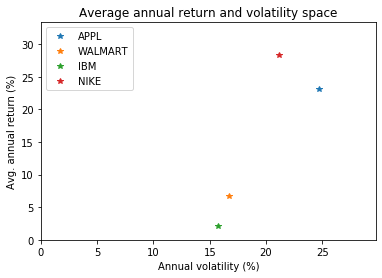

In [19]:
X = np.array(df_metrics_annualized.iloc[2]) # volatility in the x axis
Y = np.array(df_metrics_annualized.iloc[1])
C = list(df_metrics_annualized.columns)
for x, y, c in zip(X, Y, C):
    plt.plot(x, y, '*', label=c)
plt.title('Average annual return and volatility space')
plt.xlabel('Annual volatility (%)'); plt.ylabel('Avg. annual return (%)')
plt.xlim([0, max(X)+5]); plt.ylim([0, max(Y)+5])
plt.legend()

As one may expect, there seems to be a positive relationship between volatility and the average return. 